## Step 1: Import Libraries

In [1]:
"""
EXAMPLE1: Module-20-NLP/Class-3/Activities/03-Ins_Topic_Modeling_NMF/Solved/Non-Negative-Matrix-Factorization_solution.ipynb
Non-Negative Matrix Factorization(TDIFVectorizer) to Cluster headlines 

Example2: WK21-1/ 04-Ins_HuggingFace_Tokenizers_Similarity/
similarity_measures_solution
"""
import pandas as pd
from pathlib import Path

# from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Disable truncation of long strings in pandas output
pd.set_option('display.max_colwidth', None)


## Import Data

In [2]:
# file_path = Path("./Resources/yelp_filtered_reviews.csv")
file_path = Path("./Resources/yelp_filtered_reviews.csv")

customer_reviews_df = pd.read_csv(file_path)
customer_reviews_df = customer_reviews_df.rename(columns={"text":"review"})
display(customer_reviews_df.head())

,review_id,user_id,rating,review,time_created,business_id,business_name,location,category
0,a0xawbSfMoWU86xR367ysg,TTtgJzRUbOON32xVQsjErg,5,"Fantastic service and a great atmosphere! If you're here, ask for Bree she delivers some of the best hospitality Atlanta has to offer, no kidding. She made...",2025-02-27 18:24:22,eG-UO83g_5zDk70FIJbm2w,South City Kitchen Midtown,"1144 Crescent Ave NE, Atlanta, GA 30309",Southern
1,_96BtfdQTpMMPA72cgl_9A,r2Cbc1xIuJxctEJQhUozFg,5,"As I searched for someplace great to eat, reasonably priced for my first visit to Atlanta. I came upon this gem. I sat at the bar and Cassie took care of...",2025-03-26 06:40:55,eG-UO83g_5zDk70FIJbm2w,South City Kitchen Midtown,"1144 Crescent Ave NE, Atlanta, GA 30309",Southern
2,-PR8KeyLBF8cDo48ziVudA,4om9-6STuScS1BbLyYS36Q,4,"Delicious food, good drinks, fast service. I went here for the first time while in town for business. I know ATL is a foodie town, so I had to get a little...",2025-03-11 16:26:41,eG-UO83g_5zDk70FIJbm2w,South City Kitchen Midtown,"1144 Crescent Ave NE, Atlanta, GA 30309",Southern
3,w-k3D7aJOsKYh0Wdz9CzbQ,nuO42bJn2Mu498bbalMNqw,5,"Whiskey Bird is your typical neighborhood restaurant offering American-Asian fusion food. It gets pretty busy during lunch and dinner, so booking a...",2025-03-30 12:22:17,dfL1KYHtcs6YaFVx-nZTdQ,Whiskey Bird,"1409 North Highland Ave NE, Atlanta, GA 30306",New American
4,-XnUa3lVPM4HOF3uS9SD2w,Q7z79xji4Jube-VuaEe32A,5,Came here for a birthday brunch and we were impressed! There was parking across the street and it's nestled in an almost small town feel part of Atlanta.\n\nI...,2025-03-12 10:45:19,dfL1KYHtcs6YaFVx-nZTdQ,Whiskey Bird,"1409 North Highland Ave NE, Atlanta, GA 30306",New American


## Classify mood:


In [3]:
"""
Required library Installations::
1. transformers: Hugging Face library for state-of-the-art NLP models
2. sentence-transformers: Simplified interface for computing sentence embeddings and semantic similarity
3. pandas: Data handling and manipulation library
4. SentenceTransformer: Loads pre-trained models for sentence embeddings.
5. util: Provides similarity utilities like cosine similarity.
"""

# %pip install -q transformers sentence-transformers pandas
from sentence_transformers import SentenceTransformer, util

# Store Semantic Categories:
moods = [
    "adventurous", "comforting", "energizing", "romantic",
    "cozy", "festive", "indulgent", "refreshing"
]

"""
Use HugginFace sentence-transformers package and the 
all-MiniLM-L6-v2 model to classify review text
Initialize sentence Embedding Model with all_miniLM-L6-v2
to training and calculate the probalistic distance between
vectors to determin semantic similarity
"""
model = SentenceTransformer("all-MiniLM-L6-v2")  # lightweight and accurate

mood_embeddings = model.encode(moods, convert_to_tensor=True)

def assign_mood(text):
    """
    function classifies the mood of yelp customer review text
    """
    # Checks if the input is a non-empty string.
    if not isinstance(text, str) or len(text.strip()) == 0:
        return "neutral"
    
    # Encodes the review text into an embedding.
    text_embedding = model.encode(text, convert_to_tensor=True)
    
    # Compares the review embedding against mood embeddings using cosine similarity
    similarity_scores = util.pytorch_cos_sim(text_embedding, mood_embeddings)
    
    # Returns the mood with the highest similarity
    best_match = similarity_scores.argmax().item()
    return moods[best_match]

#  Add the classified moods to a new column called mood
customer_reviews_df["mood"] = customer_reviews_df["review"].apply(assign_mood)

# Output the new dataset with mood labels
output_path = "./Resources/yelp_reviews_with_mood_labels.csv"
customer_reviews_df.to_csv(output_path, index=False)

print(f"✅ Saved labeled file to: {output_path}")




✅ Saved labeled file to: ./Resources/yelp_reviews_with_mood_labels.csv


In [4]:
# Check Mood Value Counts:
mood_counts = customer_reviews_df["mood"].value_counts()
total_records_classified = customer_reviews_df["mood"].value_counts().sum()
# Print results
print("📊 Mood Classification Breakdown:\n")
print(mood_counts)
print("Total Classified Records:", total_records_classified )

# Total number of records
total_records = len(customer_reviews_df)
print(f"Total Records: {total_records}")

# Verify that all records have been classified:
if total_records_classified == total_records:
    print(f"All records have been classified")
else:
    print(f"All records have not been classified")

📊 Mood Classification Breakdown:

mood
cozy           872
indulgent      601
festive        214
adventurous    116
romantic        72
energizing      67
comforting      34
refreshing      25
Name: count, dtype: int64
Total Classified Records: 2001
Total Records: 2001
All records have been classified


In [5]:
# Loop through each unique mood and print 5 examples
for mood in customer_reviews_df["mood"].unique():
    print(f"\n===== {mood.upper()} REVIEWS =====")
    
    # Filter and get the first 5 samples
    samples = customer_reviews_df[customer_reviews_df["mood"] == mood].head(5)
    
    for i, text in enumerate(samples["review"], start=1):
        print(f"\n{i}. {text.strip()}")



===== COZY REVIEWS =====

1. Fantastic service and a great atmosphere! If you're here, ask for Bree she delivers some of the best hospitality Atlanta has to offer, no kidding. She made...

2. Delicious food, good drinks, fast service. I went here for the first time while in town for business. I know ATL is a foodie town, so I had to get a little...

3. Whiskey Bird is your typical neighborhood restaurant offering American-Asian fusion food. It gets pretty busy during lunch and dinner, so booking a...

4. Came here for a birthday brunch and we were impressed! There was parking across the street and it's nestled in an almost small town feel part of Atlanta.

I...

5. Incredible service and food. The waiters and management are all so nice and kind and made us feel like the only table in the restaurant on a busy Friday...

===== INDULGENT REVIEWS =====

1. As I searched for someplace great to eat, reasonably priced for my first visit to Atlanta.  I came upon this gem. I sat at the bar and

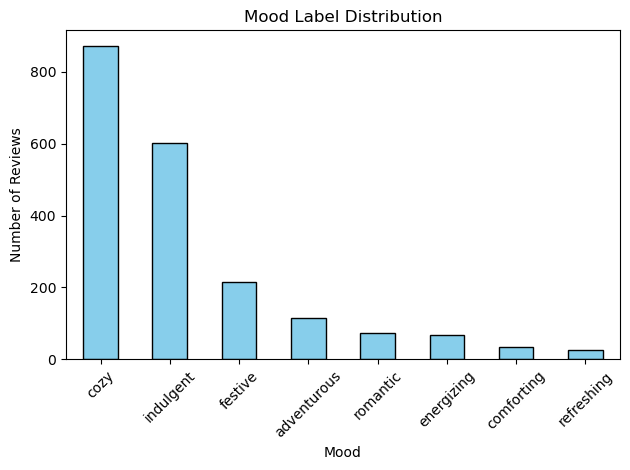

In [6]:
# Plot the mood counts
import matplotlib.pyplot as plt

mood_counts.plot(kind='bar', title='Mood Label Distribution', color='skyblue', edgecolor='black')
plt.xlabel("Mood")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
